In [2]:
import math
import torch
import gpytorch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def rbf_spect(omg, ell):
    pre = (2 * math.pi * ell**2)**(0.5)
    exp_ = torch.exp(-2. * math.pi * ell**2 * omg.pow(2))
    return pre * exp_

### Get Covariance Matrices for 2 Lengthscales

In [4]:
kern1 = gpytorch.kernels.RBFKernel()
kern2 = gpytorch.kernels.RBFKernel()

ls1 = 1.
ls2 = 4.

kern1._set_lengthscale(ls1)
kern2._set_lengthscale(ls2)

In [5]:
xx = torch.linspace(0, 10, 100)

cov1 = kern1(xx, xx).evaluate()
cov2 = kern2(xx, xx).evaluate()

## Get Eigenvalues

In [6]:
e_val, e_vec = np.linalg.eig(cov1.detach())
idx = np.abs(e_val).argsort()[::-1]   
e_val1 = torch.FloatTensor(e_val[idx].real)
e_vec1 = torch.FloatTensor(e_vec[:,idx].real)

e_val, e_vec = np.linalg.eig(cov2.detach())
idx = np.abs(e_val).argsort()[::-1]   
e_val2 = torch.FloatTensor(e_val[idx].real)
e_vec2 = torch.FloatTensor(e_vec[:,idx].real)

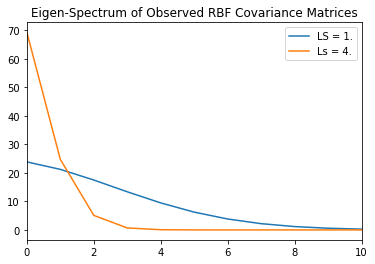

In [13]:
cutoff = 25
plt.plot(e_val1[:cutoff], label="LS = 1.")
plt.plot(e_val2[:cutoff], label="Ls = 4.")
plt.title("Eigen-Spectrum of Observed RBF Covariance Matrices")
plt.xlim(0, 10)
plt.legend();

## Get Spectral Densities

In [8]:
omg = torch.linspace(0, 5, 200)
dens1 = rbf_spect(omg, ls1)
dens2 = rbf_spect(omg, ls2)

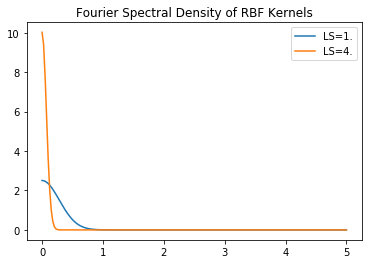

In [9]:
plt.plot(omg, dens1, label="LS=1.")
plt.plot(omg, dens2, label="LS=4.")
plt.title("Fourier Spectral Density of RBF Kernels")
plt.legend();

In [16]:
from scipy.stats import gaussian_kde
def plot_eval_density_by_lengthscale(ls, n=100):
    kernel = gpytorch.kernels.RBFKernel()
    kernel.lengthscale = ls
    x = torch.linspace(0, 25., n)
    evals = torch.symeig(kernel(x).evaluate())[0]
    xs = np.linspace(0,5,n)
    density = gaussian_kde(evals.data.numpy())
    plt.plot(xs, density(xs), label=str(ls))

In [15]:
plot_eval_density_by_lengthscale(1., 100)

NameError: name 'gaussian_kde' is not defined

In [17]:
kernel = gpytorch.kernels.RBFKernel()
kernel.lengthscale = 1.
x = torch.linspace(0, 10., 100)
evals = torch.symeig(kernel(x).evaluate())[0]

(array([93.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.]),
 array([-3.11875920e-06,  2.38699412e+00,  4.77399111e+00,  7.16098833e+00,
         9.54798508e+00,  1.19349823e+01,  1.43219795e+01,  1.67089767e+01,
         1.90959740e+01,  2.14829712e+01,  2.38699684e+01], dtype=float32),
 <a list of 10 Patch objects>)

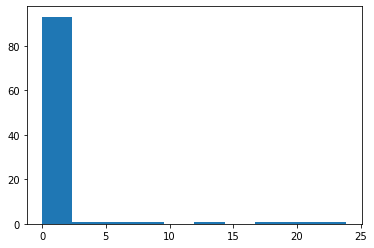

In [20]:
plt.hist(evals.detach())

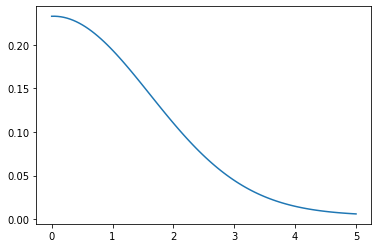

In [23]:
xs = np.linspace(0,5,100)
density = gaussian_kde(evals.data.numpy())
plt.plot(xs, density(xs), label=str(1.))